In [223]:
import pandas as pd
pd.options.display.float_format = '{:,.10f}'.format
import numpy as np
import json
from sklearn import preprocessing

In [218]:
f = open('data.json')

In [219]:
data = json.load(f)

In [220]:
#data

In [221]:
#data = json.loads(f.read())
#data

In [257]:
vel = []
time = []
diff_vel = []
diff_time = []
vel0 = 0
vel1 = 0
time0 = 0
time1 = 0
for i in data:
    vel0 = float(vel1)
    #vel0 = float(vel1) * 5 / 18
    line = str(i)
    vel1 = float(line.split(": ")[1].split(",")[0])
    #vel1 = float(line.split(": ")[1].split(",")[0]) * 5 / 18
    diff_vel_temp = float(vel1 - vel0)
    
    time0 = int(time1)
    time1 = int(line.split(": ")[2].split("}")[0])
    diff_time_temp = float(time1 - time0)
    
    #diff_vel.append(diff_vel_temp)
    #diff_time.append(diff_time_temp)
    vel.append(vel1)
    time.append(time1)
    #print(line.split(": ")[1].split(",")[0] + " " + line.split(": ")[2].split("}")[0])

preprocessing.normalize([vel])
preprocessing.normalize([time])

for i in range(len(vel)):
    if i == 0:
        diff_vel.append(0)
    else:
        diff_vel.append(vel[i] - vel[i - 1])

for i in range(len(time)):
    if i == 0:
        diff_time.append(0)
    else:
        diff_time.append(time[i] - time[i - 1])

acc = []
for i in range(len(vel)):
    if i == 0 :
        acc.append(0)
    else:
        acc.append(diff_vel[i] * 1000 / (diff_time[i]))

acc_diff = []
for i in range(len(vel)):
    if i == 0:
        acc_diff.append(0)
    else:
        acc_diff.append(acc[i] - acc[i - 1])

jerk = []
for i in range(len(vel)):
    if i == 0 :
        jerk.append(0)
    else:
        jerk.append(abs(acc_diff[i] * 1000 / (diff_time[i])))

data_list = [vel, time, diff_vel, diff_time, acc, acc_diff, jerk]
#i = 0
#while i < len(vel):
#    print[i]
#    i += 1
df_table = pd.DataFrame(data_list).transpose()
df_table.columns = ['velocity', 'time', 'diff_vel', 'diff_time', 'acc', 'acc_diff', 'jerk']
df_table['peak'] = np.where(df_table['jerk'] >= 0.6 , 0, 1)
overall_score = df_table['peak'].sum() / df_table['velocity'].count()
overall_time = df_table['diff_time'].sum() 
print('Your score for all trip = ', overall_score * 100)
last_100_score = df_table['peak'].tail(100).sum() / df_table['peak'].tail(100).count()
last_100_time = df_table['diff_time'].tail(100).sum() 
print('Your score for last ', last_100_time / 1000, 'seconds = ', last_100_score * 100)

Your score for all trip =  69.5
Your score for last  12.273 seconds =  72.0


In [258]:
#df_table['time'].plot(kind='kde')

In [259]:
#df_table.head(50)

In [260]:
#df_table['velocity'].plot(kind='kde')

In [261]:
#df_table.head(50)

In [262]:
# vel = []
# time = []
# diff_vel = []
# diff_time = []
# vel0 = 0
# vel1 = 0
# time0 = 0
# time1 = 0
# with open('test1.txt') as f:
#     for line in f:
#         vel0 = float(vel1) * 5 / 18
#         vel1 = float(line.split(": ")[1].split(",")[0]) * 5 / 18
#         diff_vel_temp = float(vel1 - vel0)
        
#         time0 = int(time1)
#         time1 = int(line.split(": ")[2].split("}")[0])
#         diff_time_temp = float(time1 - time0)
        
#         #diff_vel.append(diff_vel_temp)
#         #diff_time.append(diff_time_temp)
#         vel.append(vel1)
#         time.append(time1)
#         #print(line.split(": ")[1].split(",")[0] + " " + line.split(": ")[2].split("}")[0])


# for i in range(len(vel)):
#     if i == 0:
#         diff_vel.append(0)
#     else:
#         diff_vel.append(vel[i] - vel[i - 1])

# for i in range(len(time)):
#     if i == 0:
#         diff_time.append(0)
#     else:
#         diff_time.append(time[i] - time[i - 1])

# acc = []
# for i in range(len(vel)):
#     if i == 0 :
#         acc.append(0)
#     else:
#         acc.append(diff_vel[i] * 1000 / (diff_time[i]))

# acc_diff = []
# for i in range(len(vel)):
#     if i == 0:
#         acc_diff.append(0)
#     else:
#         acc_diff.append(acc[i] - acc[i - 1])

# jerk = []
# for i in range(len(vel)):
#     if i == 0 :
#         jerk.append(0)
#     else:
#         jerk.append(abs(acc_diff[i] * 1000 / (diff_time[i])))

# data_list = [vel, time, diff_vel, diff_time, acc, acc_diff, jerk]
# #i = 0
# #while i < len(vel):
# #    print[i]
# #    i += 1
# df_table = pd.DataFrame(data_list).transpose()
# df_table.columns = ['velocity', 'time', 'diff_vel', 'diff_time', 'acc', 'acc_diff', 'jerk']
# df_table['peak'] = np.where(df_table['jerk'] >= 0.6 , 0, 1)
# overall_score = df_table['peak'].sum() / df_table['velocity'].count()
# overall_time = df_table['diff_time'].sum() 
# print(overall_score * 100,  ' for ' , overall_time / 1000, ' seconds')
# last_100_score = df_table['peak'].tail(100).sum() / df_table['peak'].tail(100).count()
# last_100_time = df_table['diff_time'].tail(100).sum() 
# print(last_500_score * 100,  ' for ' , last_500_time / 1000, ' seconds')

In [232]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

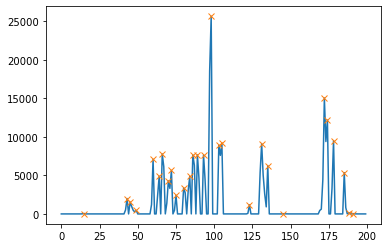

In [272]:
x = df_table['jerk']
peaks, _ = find_peaks(x, distance=1)
np.diff(peaks)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

In [240]:
#df_table.describe()